# Landfill Inference
This notebook is created for testing out the landfill detection AI model.

## Setup
Making sure that everything is in place.

In [2]:
import os
import dotenv
import boto3
dotenv.load_dotenv()

! export AWS_REGION=eu-west-1
! aws s3 ls --region=eu-west-1

client = boto3.client("sagemaker-runtime", region_name="eu-west-1")


2025-01-07 17:16:10 aereal-waste
2024-11-12 06:21:08 amazon-connect-e9096db21c9b
2024-10-30 20:08:59 amazon-datazone-772012299168-eu-west-1-802356441
2024-10-30 20:16:45 amplify-visualizzazionecredi-dev-103043-deployment
2024-10-30 20:16:45 amplify-visualizzazionecredi-stg-90157-deployment
2024-10-26 06:56:17 ariston-temp
2024-10-30 21:07:15 aws-glue-assets-772012299168-eu-west-1
2024-11-23 12:11:35 aws-sam-cli-managed-default-samclisourcebucket-1764235s5voef
2024-11-07 23:03:04 aws-sam-cli-managed-default-samclisourcebucket-1lof9ldfv3e5r
2023-10-05 12:42:46 badrock-test-connect-genai
2024-12-27 10:42:22 cdk-hnb659fds-assets-772012299168-eu-west-1
2023-07-20 18:23:11 cdk-hnb659fds-assets-772012299168-us-east-1
2024-10-30 22:47:31 cdkpipelinestack-cdkpipelineartifactsbucketdd732d7-8isqjf8cbucr
2024-10-30 22:47:32 cdkpipelinestack-pipelineartifactsbucket22248f97-obfzqrufg5xb
2024-10-30 22:47:32 cdkpipelinestack-pipelineartifactsbucketaea9a052-a5mmqkp4dzic
2024-10-30 22:47:32 cdkpipelines

## Config
Configuring Global variables

In [3]:
DATA_PATH=".in"
ENDPOINT_NAME = "scrnts-dev-landfill-yolo-endpoint"

## Prepare Payload

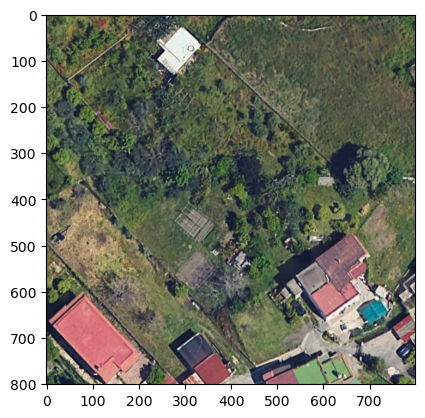

In [4]:
import base64
import cv2
from matplotlib import pyplot as plt


img_name = "inference-1.png"
image_base64 = None

# Open image as base64
image_path = os.path.join(DATA_PATH, img_name)
with open(image_path, "rb") as image_file:
    image_base64 = base64.b64encode(image_file.read()).decode("utf-8")

image_cv2 = cv2.imread(image_path)
image_cv2_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(image_cv2_rgb)
plt.show()

### Create local inference model

In [17]:
import numpy as np
import torch
from ultralytics import YOLO

model = YOLO(model='.in/2025-02-10.pt', task='predict')

result = model(image_cv2_rgb)


0: 800x800 (no detections), 180.9ms
Speed: 4.4ms preprocess, 180.9ms inference, 0.7ms postprocess per image at shape (1, 3, 800, 800)


In [18]:
import json

print("Inference result:")
for r in result:
    print(r)

Inference result:
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'dumping-sites'}
obb: None
orig_img: array([[[103, 103,  55],
        [ 92,  91,  44],
        [ 74,  85,  51],
        ...,
        [ 81,  97,  51],
        [ 80,  99,  52],
        [ 85, 106,  57]],

       [[108, 107,  58],
        [ 95,  93,  46],
        [ 82,  93,  58],
        ...,
        [ 87, 104,  57],
        [ 88, 107,  59],
        [ 91, 112,  63]],

       [[111, 110,  61],
        [102, 100,  52],
        [ 90, 101,  65],
        ...,
        [100, 116,  69],
        [101, 120,  71],
        [ 96, 116,  68]],

       ...,

       [[ 58,  80,  66],
        [ 51,  70,  58],
        [ 70,  89,  70],
        ...,
        [153, 156, 133],
        [165, 162, 144],
        [178, 170, 158]],

       [[ 65,  86,  73],
        [ 60,  82,  70],
        [ 57,  77,  55],
        ...,
        [149, 153, 125],
        [160,

891.0597534179688| 31.667724609375| 1092.5836181640625| 306.4197692871094| 0.39718666672706604| 0.0


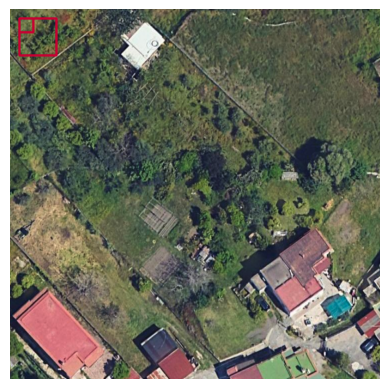

In [14]:
import copy

# Define a temp image to be modified
temp_image = copy.deepcopy(image_cv2_rgb)

boxes = result['boxes']
for box in boxes:
    x1, y1, x2, y2, conf, cls = box
    print("| ".join([str(x1), str(y1), str(x2), str(y2), str(conf), str(cls)]))
    cv2.rectangle(temp_image, (int(x1), int(y1)), (int(x2), int(y2)), (200, 0, 50), 3)
    label = f"Conf: {conf:.2f}"
    cv2.putText(
        temp_image,
        label,
        (int(x1), int(y1) - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        (0, 255, 0),
        2,
    )
plt.imshow(temp_image)
plt.axis("off")
plt.show()